rough mayorga

In [1]:
import math
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from datetime import datetime

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
import sklearn.preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.feature_selection import SelectKBest, f_regression, RFE

In [2]:
## Trusty Modules

from Acquire import get_texas_data
from Prepare import prepare_tex, create_features, make_bins_and_feats, split_data
import m_explore as e

# Acquire

In [3]:
df = get_texas_data()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144738 entries, 0 to 144737
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   AGY                      144738 non-null  int64  
 1   NAME                     144738 non-null  object 
 2   LASTNAME                 144738 non-null  object 
 3   FIRSTNAME                144738 non-null  object 
 4   MI                       144738 non-null  object 
 5   JOBCLASS                 144738 non-null  object 
 6   JC TITLE                 144738 non-null  object 
 7   RACE                     144738 non-null  object 
 8   SEX                      144738 non-null  object 
 9   EMPTYPE                  144738 non-null  object 
 10  HIREDT                   144738 non-null  object 
 11  RATE                     144738 non-null  float64
 12  HRSWKD                   144738 non-null  float64
 13  MONTHLY                  144738 non-null  float64
 14  ANNU

# Prepare

Looking At Our Maximum Age and Minimum Age to Make Some Age Bins

Max: 49.8, Min: 0.0

----------------------------

Visualizing Years of Tenure Column To Help with Binning



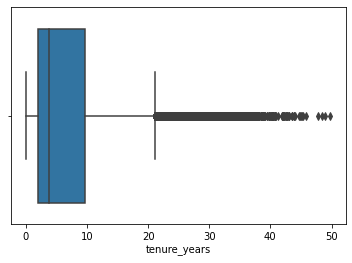


----------------------------

Looking At Our Years of Tenure Bins Value Counts
1    83012
2    27330
3    25513
4     8875
Name: tenure_years_bins, dtype: int64

----------------------------



In [5]:
df = prepare_tex(df)
df = create_features(df)
df = make_bins_and_feats(df)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144730 entries, 0 to 144737
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   agency_id          144730 non-null  int64         
 1   agency             144730 non-null  object        
 2   lastname           144730 non-null  object        
 3   firstname          144730 non-null  object        
 4   title              144730 non-null  object        
 5   race               144730 non-null  object        
 6   sex                144730 non-null  object        
 7   emptype            144730 non-null  object        
 8   hire_date          144730 non-null  datetime64[ns]
 9   hours_worked       144730 non-null  float64       
 10  monthly_salary     144730 non-null  float64       
 11  annual_salary      144730 non-null  float64       
 12  is_female          144730 non-null  int64         
 13  is_white           144730 non-null  int64   

In [7]:
df.head().T

,0,1,2,3,4
agency_id,101,104,101,104,101
agency,SENATE,LEGISLATIVE BUDGET BOARD,SENATE,LEGISLATIVE BUDGET BOARD,SENATE
lastname,GILLIAM,GILLIAM,NELSON,NELSON,ROCHA
firstname,STACEY,STACEY,DAVID,DAVID,MARIE
title,LEG. OFFICIAL/ADMINISTRATOR,COMMITTEE DIRECTOR,LEG. OFFICIAL/ADMINISTRATOR,SENIOR BUDGET ADVISOR,LEG. SERVICE/MAINTENANCE
race,WHITE,WHITE,WHITE,WHITE,HISPANIC
sex,FEMALE,FEMALE,MALE,MALE,FEMALE
emptype,URP - UNCLASSIFIED REGULAR PART-TIME,URP - UNCLASSIFIED REGULAR PART-TIME,URP - UNCLASSIFIED REGULAR PART-TIME,URP - UNCLASSIFIED REGULAR PART-TIME,URF - UNCLASSIFIED REGULAR FULL-TIME
hire_date,2013-07-01 00:00:00,2017-11-01 00:00:00,1998-12-01 00:00:00,2017-11-01 00:00:00,2003-05-01 00:00:00
hours_worked,20,20,20,20,41


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
agency_id,144730.0,542.139011,140.558625,101.0,529.00,530.00,696.0,930.0
hours_worked,144730.0,39.702776,2.336290,2.0,40.00,40.00,40.0,80.0
monthly_salary,144730.0,4319.108757,2137.890937,50.0,3025.91,3720.17,5000.0,46125.0
annual_salary,144730.0,51829.305083,25654.691246,600.0,36310.92,44642.04,60000.0,553500.0
is_female,144730.0,0.572549,0.494710,0.0,0.00,1.00,1.0,1.0
is_white,144730.0,0.446673,0.497150,0.0,0.00,0.00,1.0,1.0
is_hispanic,144730.0,0.273295,0.445653,0.0,0.00,0.00,1.0,1.0
is_black,144730.0,0.234665,0.423790,0.0,0.00,0.00,0.0,1.0
is_BIPOC,144730.0,0.553327,0.497150,0.0,0.00,1.00,1.0,1.0
race_encoded,144730.0,3.593270,1.358207,0.0,2.00,3.00,5.0,5.0


# Explore

In [14]:
cat_vars = ['agency', 'title', 'race', 'sex', 'emptype']
quant_vars = ['hours_worked', 'monthly_salary', 'annual_salary', 'tenure_months', 'tenure_years']

Bar Plot of agency


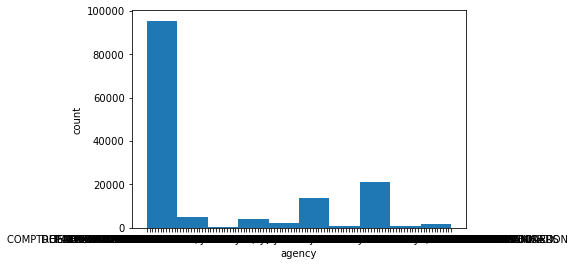

Bar Plot of title


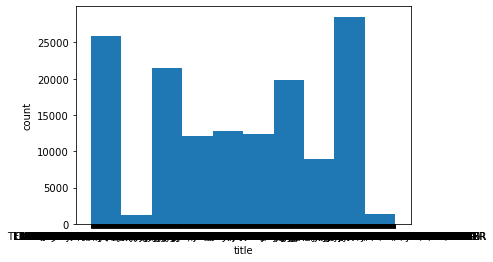

Bar Plot of race


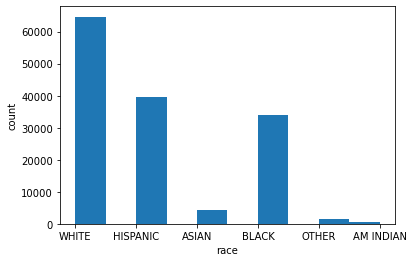

Bar Plot of sex


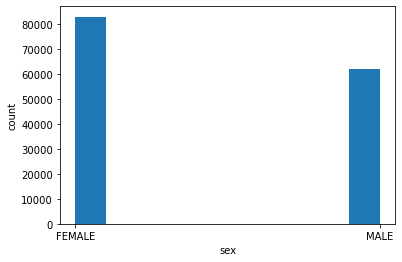

Bar Plot of emptype


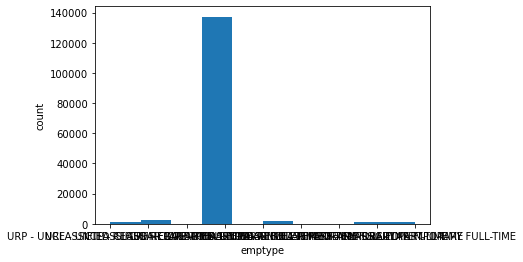

Distribution of hours_worked


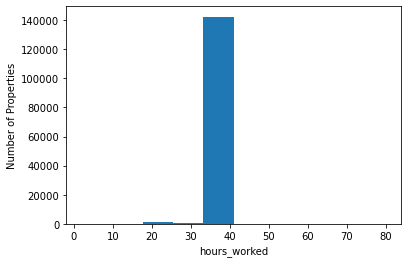

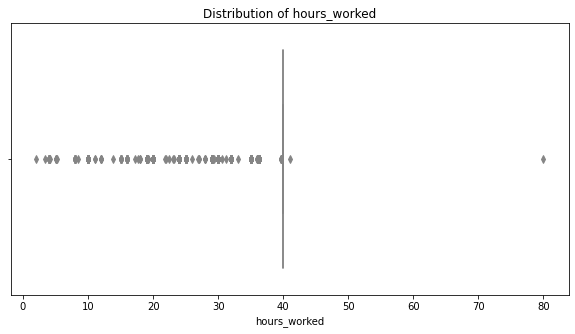

Distribution of monthly_salary


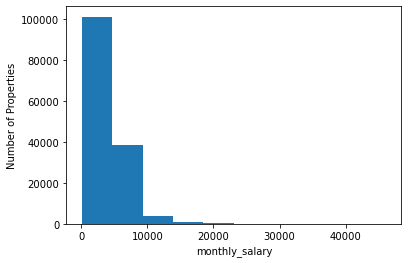

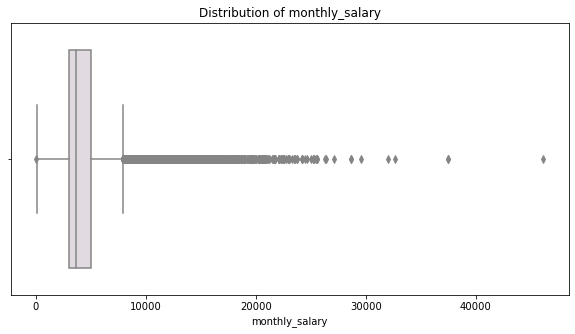

Distribution of annual_salary


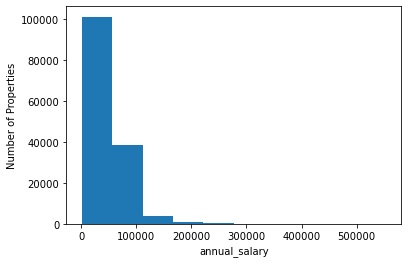

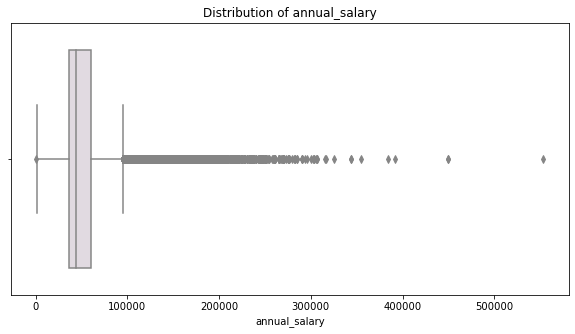

Distribution of tenure_months


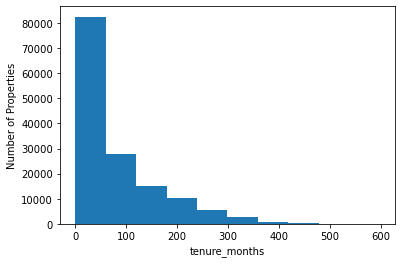

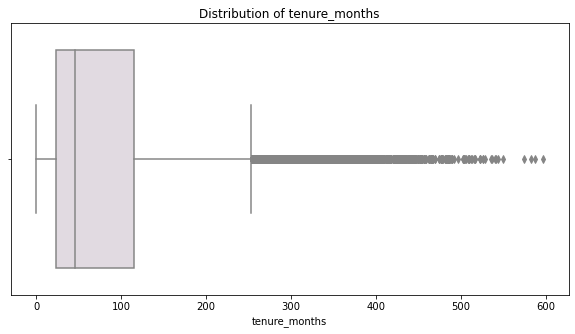

Distribution of tenure_years


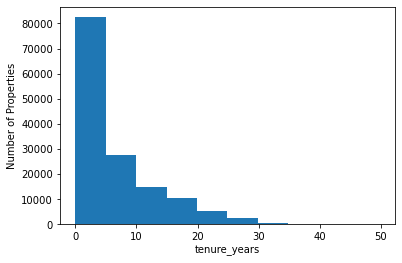

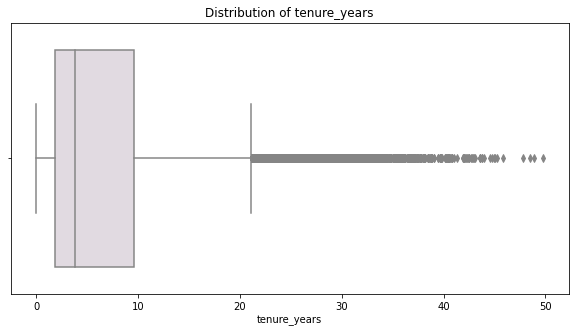

In [15]:
e.explore_univariate(df, cat_vars, quant_vars)

## Split the data

In [11]:
train, validate, test = split_data(df)

Making Sure Our Shapes Look Good
Train: (81048, 26), Validate: (34736, 26), Test: (28946, 26)


In [16]:
sample_df = train.sample(1000)

In [ ]:
e.plot_variable_pairs(train, )

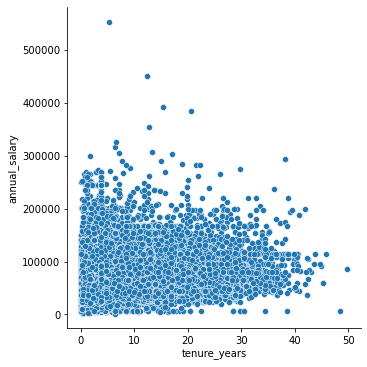

In [12]:
sns.relplot(x='tenure_years', y='annual_salary', data=train)

In [19]:
df.title.value_counts()

CORREC  OFFICER IV               8753
CORREC  OFFICER V                7350
TEXAS WORKS ADVISOR II           3812
CORREC OFFCR III                 3652
DIRECT SUPPORT PROFESSIONAL I    2483
                                 ... 
EX DIRECTOR TDCJ                    1
DATABASE ADMINISTRATOR IV           1
LEGAL ASSISTANT                     1
LEG OFFICE CONSULTANT IV            1
UNEMPL INSUR SPEC II                1
Name: title, Length: 1406, dtype: int64

In [21]:
df.title.str.endswith('II').value_counts()

False    85387
True     59343
Name: title, dtype: int64

In [23]:
df.title.str.contains('DIRECTOR').value_counts()

False    141722
True       3008
Name: title, dtype: int64